In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy import stats

In [3]:
DATA_DIR = '/kaggle/input/house-prices-advanced-regression-techniques/'

In [4]:
train_df = pd.read_csv(DATA_DIR + 'train.csv')
test_df = pd.read_csv(DATA_DIR + 'test.csv')

In [5]:
train_df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [6]:
test_df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
0            Lvl    AllPub  ...         120        0    NaN  MnPrv   
1            Lvl    AllPub  ...           0        0    NaN    NaN   
2            Lvl    AllPub  ...           0        0    NaN  MnPrv   
3            Lvl    AllPub  ...           0        0    NaN    NaN   
4            HLS    AllPub  ...         144        0    NaN    NaN   
...          ...       ...  ...         ...      ...    ...    ...   
1454         Lvl    AllPub  ...           0        0    NaN    NaN   
1455         Lvl    AllPub  ...           0        0    NaN    NaN   
1456         Lvl    AllPub  ...           0        0    NaN    NaN   
1457         Lvl    AllPub  ...           0        0    NaN  MnPrv   
1458         Lvl    AllPub  ...           0        0    NaN    NaN   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0            NaN       0      6    2010        WD         Normal  
1           Gar2   12500      6    2010        WD         Normal  
2            NaN       0      3    2010        WD         Normal  
3            NaN       0      6    2010        WD         Normal  
4            NaN       0      1    2010        WD         Normal  
...          ...     ...    ...     ...       ...            ...  
1454         NaN       0      6    2006        WD         Normal  
1455         NaN       0      4    2006        WD        Abnorml  
1456         NaN       0      9    2006        WD        Abnorml  
1457        Shed     700      7    2006        WD         Normal  
1458         NaN       0     11    2006        WD         Normal  

[1459 rows x 80 columns]

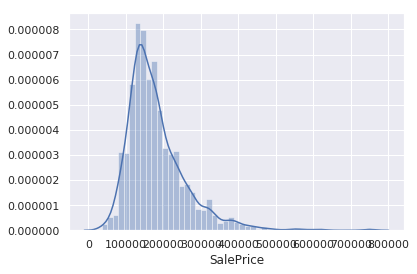

In [7]:
sns.distplot(train_df['SalePrice'])

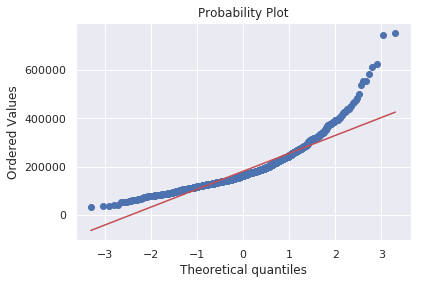

In [8]:
fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], plot=plt)

In [9]:
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [10]:
lowerbound, upperbound = np.percentile(train_df['SalePrice'], [0.5, 99.5])
print(lowerbound, upperbound)
train_df = train_df.drop(train_df[(train_df['SalePrice']<lowerbound) | (train_df['SalePrice']>upperbound)].index)

55000.0 527331.9149999974


In [11]:
train_df['SalePrice'].describe()

count      1445.000000
mean     179158.383391
std       71908.821387
min       55000.000000
25%      130000.000000
50%      163000.000000
75%      213490.000000
max      501837.000000
Name: SalePrice, dtype: float64

In [12]:
# SCALE TARGET VARIABLE
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])

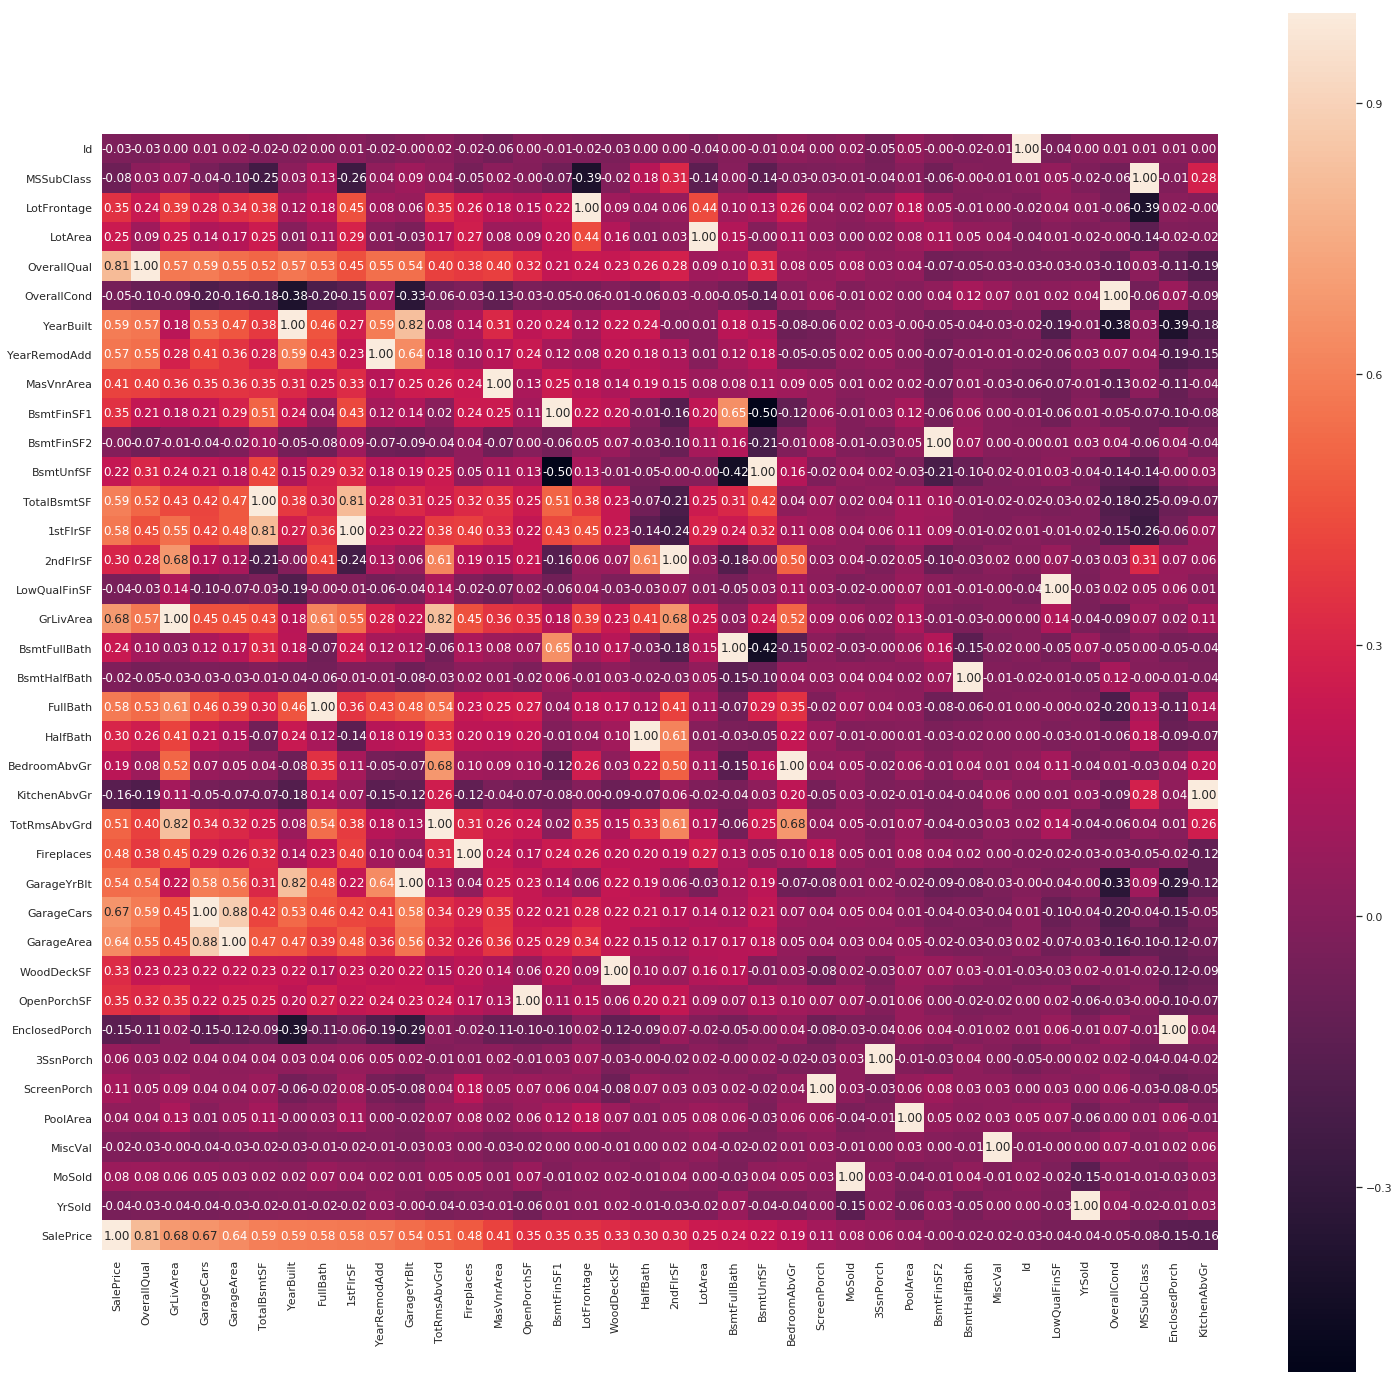

In [13]:
corr_matrix = train_df.corr()
corr_matrix.sort_values(by='SalePrice', inplace=True, axis=1, ascending=False)
plt.figure(figsize=(25,25))
sns.heatmap(corr_matrix, square=True, annot=True, fmt='0.2f')

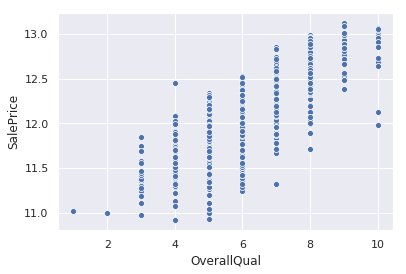

In [14]:
sns.scatterplot(x=train_df['OverallQual'], y=train_df['SalePrice'])

In [15]:
train_df = train_df.drop(train_df[train_df['OverallQual']<=2].index)
train_df = train_df.drop(train_df[(train_df['OverallQual']==10) & (train_df['SalePrice']<12.5)].index)
train_df = train_df.drop(train_df[(train_df['OverallQual']==4) & (train_df['SalePrice']>12.3)].index)
train_df = train_df.drop(train_df[(train_df['OverallQual']==7) & (train_df['SalePrice']<11.5)].index)

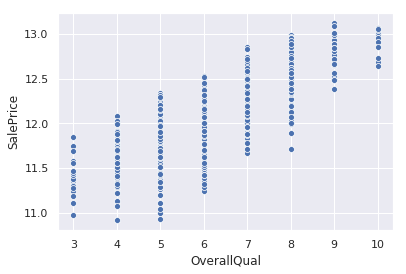

In [16]:
sns.scatterplot(x=train_df['OverallQual'], y=train_df['SalePrice'])

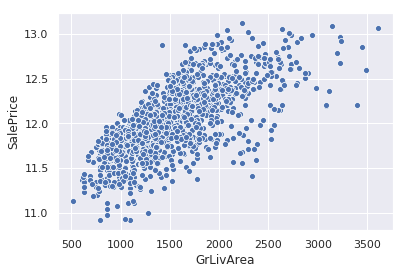

In [17]:
sns.scatterplot(x=train_df['GrLivArea'], y=train_df['SalePrice'])

In [18]:
train_df = train_df.drop(train_df[(train_df['GrLivArea']>3300) & (train_df['SalePrice']<12.5)].index)

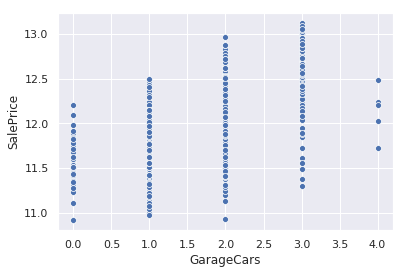

In [19]:
sns.scatterplot(x=train_df['GarageCars'], y=train_df['SalePrice'])

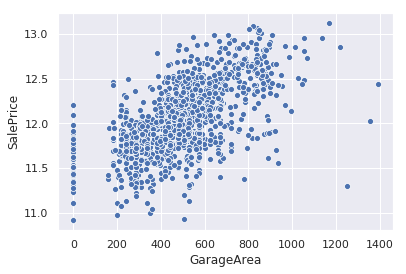

In [20]:
sns.scatterplot(x=train_df['GarageArea'], y=train_df['SalePrice'])

In [21]:
train_df = train_df.drop(train_df[train_df['GarageArea']>1230].index)

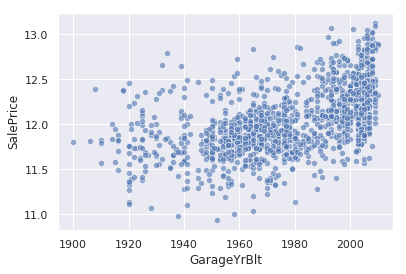

In [22]:
sns.scatterplot(x=train_df['GarageYrBlt'], y=train_df['SalePrice'], alpha=0.6)

In [23]:
train_df['GarageTotal'] = train_df['GarageArea']*train_df['GarageCars']
test_df['GarageTotal'] = test_df['GarageArea']*test_df['GarageCars']

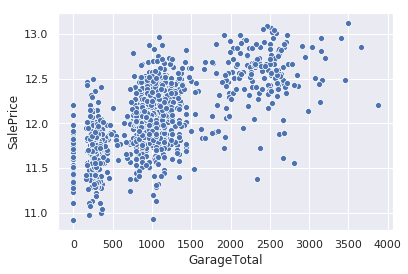

In [24]:
sns.scatterplot(x=train_df['GarageTotal'], y=train_df['SalePrice'])

In [25]:
train_df = train_df.drop(train_df[train_df['GarageTotal']>3750].index)
train_df = train_df.drop(train_df[(train_df['SalePrice']<11.7) & (train_df['GarageTotal']>2000)].index)

In [26]:
train_df.drop(['GarageArea', 'GarageCars'], axis=1, inplace=True)
test_df.drop(['GarageArea', 'GarageCars'], axis=1, inplace=True)

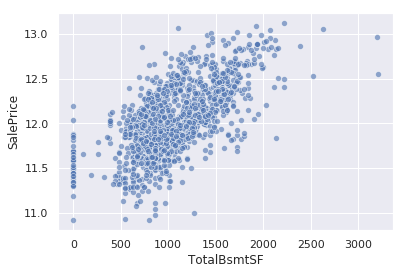

In [27]:
sns.scatterplot(x=train_df['TotalBsmtSF'], y=train_df['SalePrice'], alpha=0.6)

In [28]:
train_df = train_df.drop(train_df[train_df['TotalBsmtSF']>3000].index)
train_df = train_df.drop(train_df[(train_df['SalePrice']<11.1) & (train_df['TotalBsmtSF']>1000)].index)

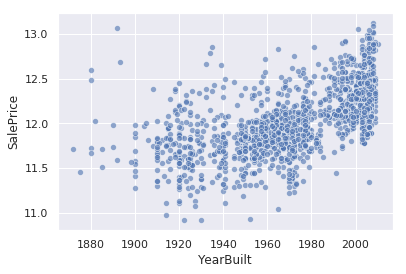

In [29]:
sns.scatterplot(x=train_df['YearBuilt'], y=train_df['SalePrice'], alpha=0.6)

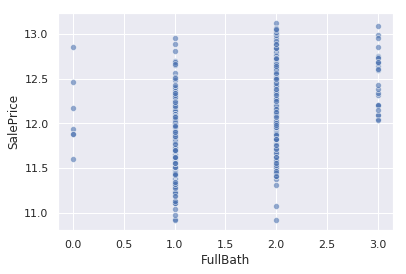

In [30]:
sns.scatterplot(x=train_df['FullBath'], y=train_df['SalePrice'], alpha=0.6)

In [31]:
train_df = train_df.drop(train_df[(train_df['SalePrice']<11.2) & (train_df['FullBath']==2)].index)
train_df = train_df.drop(train_df[(train_df['SalePrice']>12.8) & (train_df['FullBath']<=1)].index)

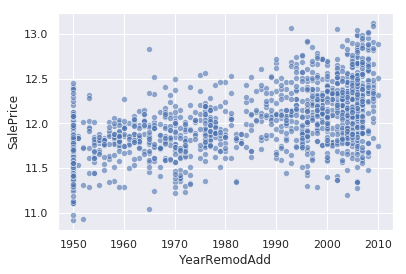

In [32]:
sns.scatterplot(x=train_df['YearRemodAdd'], y=train_df['SalePrice'], alpha=0.6)

In [33]:
train_df['RemodToSold'] = train_df['YrSold']-train_df['YearRemodAdd']
test_df['RemodToSold'] = test_df['YrSold']-test_df['YearRemodAdd']

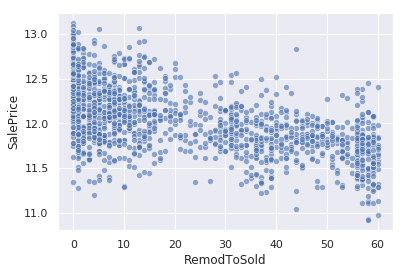

In [34]:
sns.scatterplot(x=train_df['RemodToSold'], y=train_df['SalePrice'], alpha=0.6)

In [35]:
train_df.drop(['YrSold', 'YearRemodAdd'], axis=1, inplace=True)
test_df.drop(['YrSold', 'YearRemodAdd'], axis=1, inplace=True)

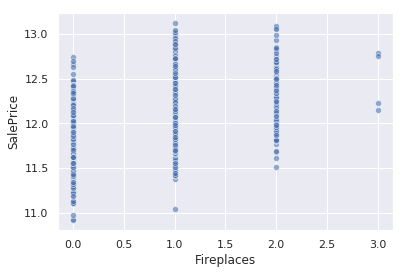

In [36]:
sns.scatterplot(x=train_df['Fireplaces'], y=train_df['SalePrice'], alpha=0.6)

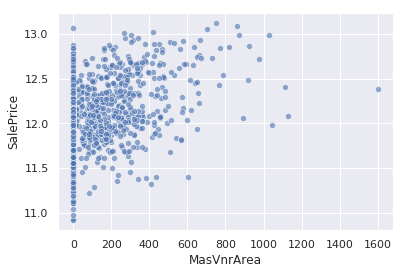

In [37]:
sns.scatterplot(x=train_df['MasVnrArea'], y=train_df['SalePrice'], alpha=0.6)

In [38]:
train_df = train_df.drop(train_df[(train_df['SalePrice']<12.5) & (train_df['MasVnrArea']>1000)].index)
train_df = train_df.drop(train_df[(train_df['SalePrice']<11.5) & (train_df['MasVnrArea']>500)].index)

# Categorical Features

In [39]:
cat_features = [f for f in train_df.columns if train_df[f].dtype == 'object']
cat_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [40]:
def analyzeCategoricalFeature(x, y):
    f, axes = plt.subplots(1,3, figsize=(20,5))
    f.suptitle(x)

    axes[0].set_title("box plot")
    axes[0].tick_params(axis='x', labelrotation=45)
    sns.boxplot(x=train_df[x], y=train_df[y], ax=axes[0])

    axes[1].set_title("stirp plot")
    axes[1].tick_params(axis='x',labelrotation=45)
    sns.stripplot(x=train_df[x], y=train_df[y], jitter=0.4, alpha=0.5, marker="D", size=5, ax=axes[1])

    axes[2].set_title("frequency plot")
    axes[2].tick_params(axis='x',labelrotation=45)
    sns.countplot(x=train_df[x], ax=axes[2])

In [41]:
cat_to_drop = ['Street', 'Alley', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2',
               'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior2nd', 'BsmtFinType2', 'Heating', 'Functional',
               'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


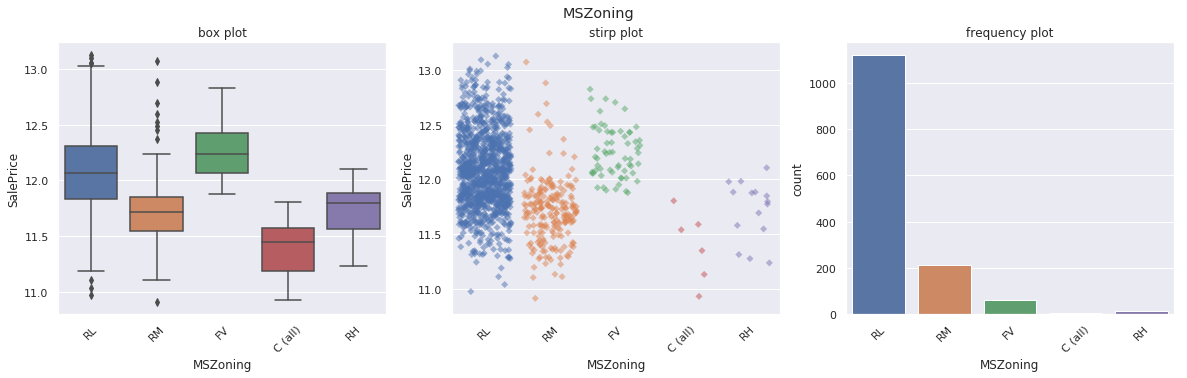

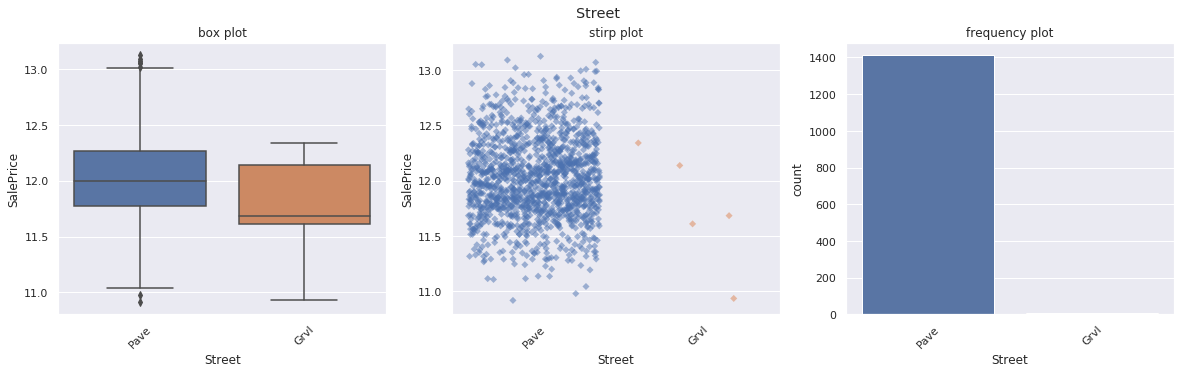

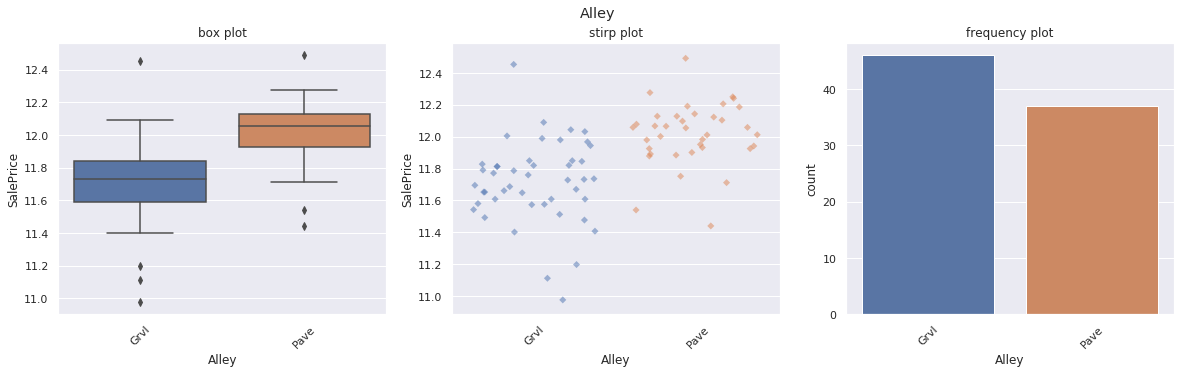

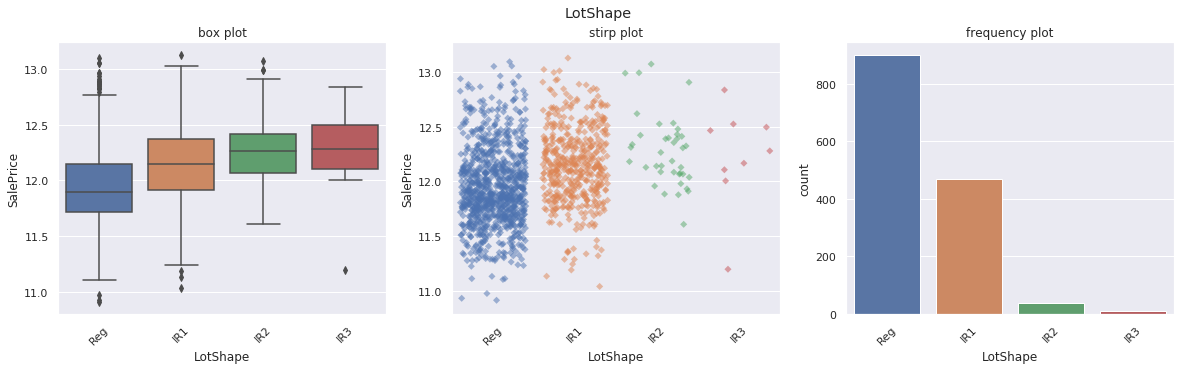

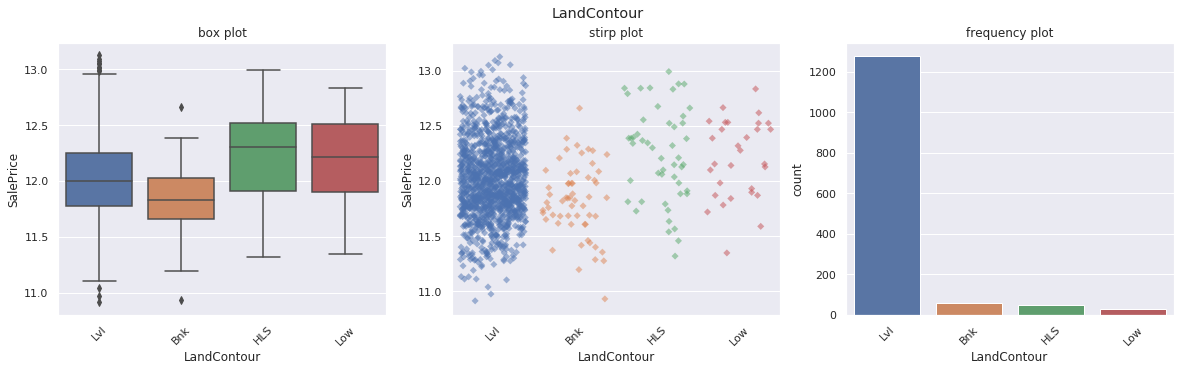

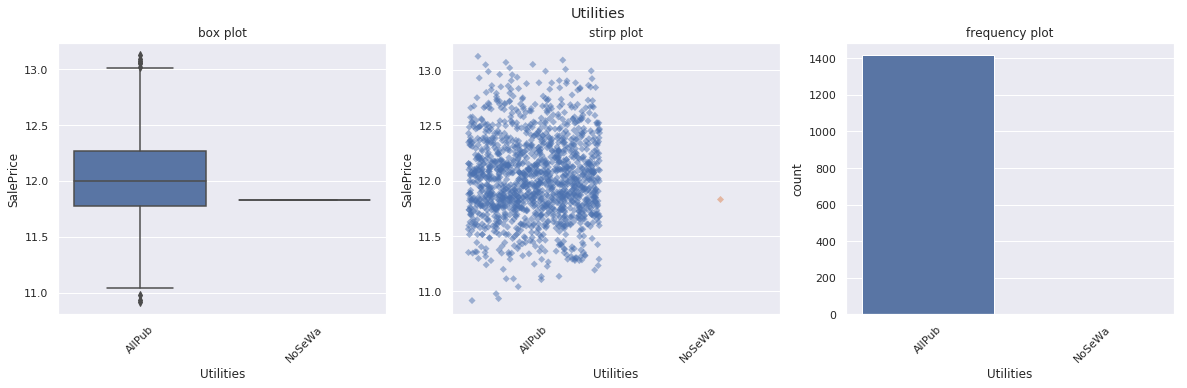

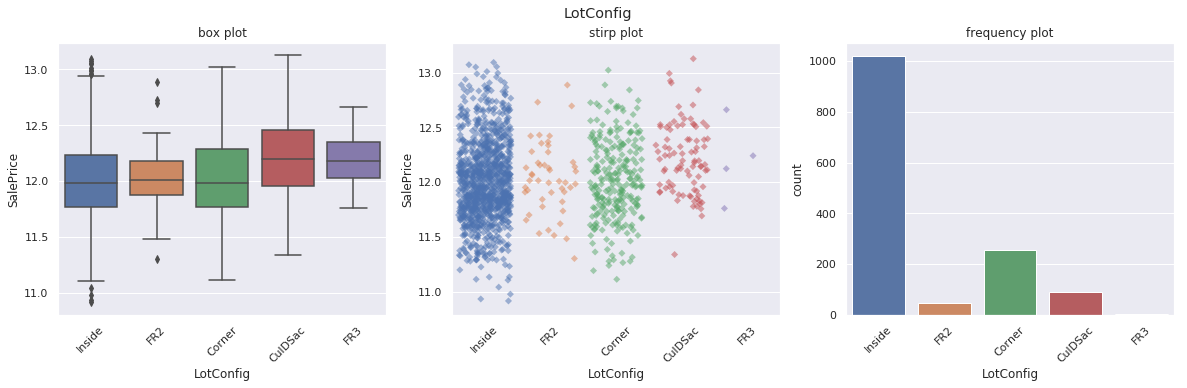

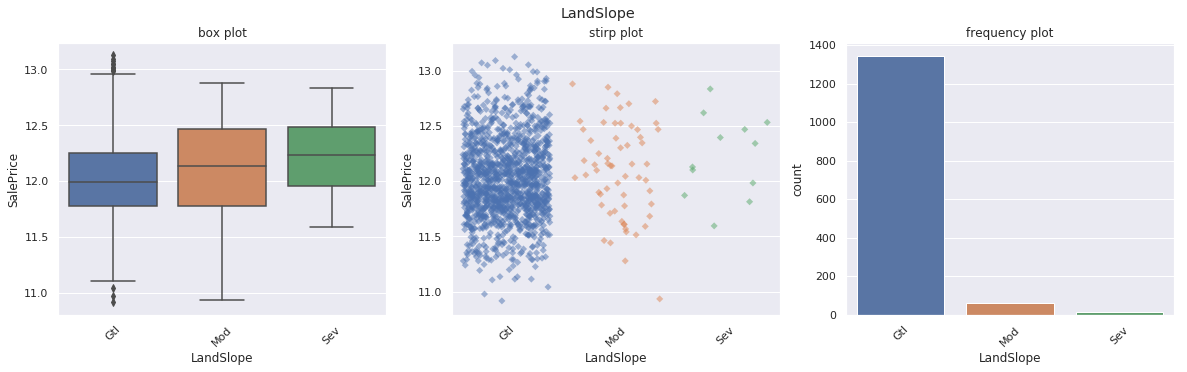

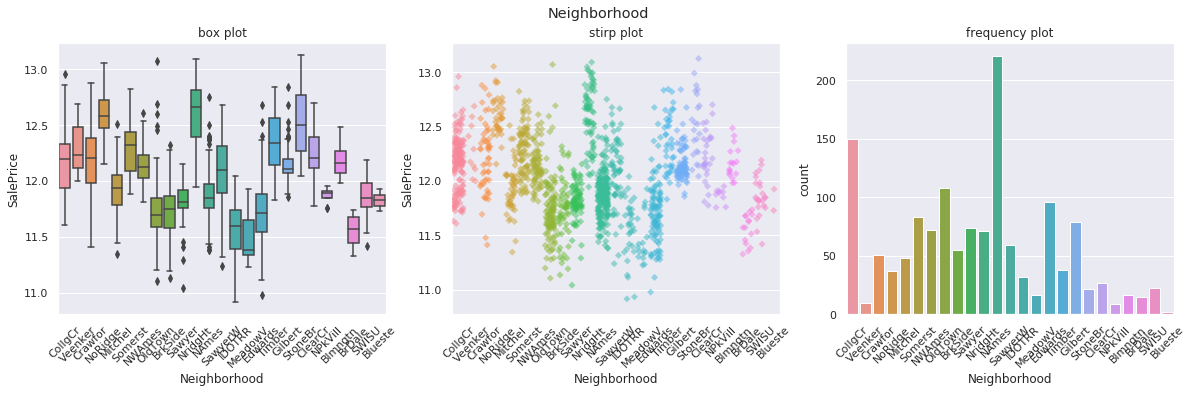

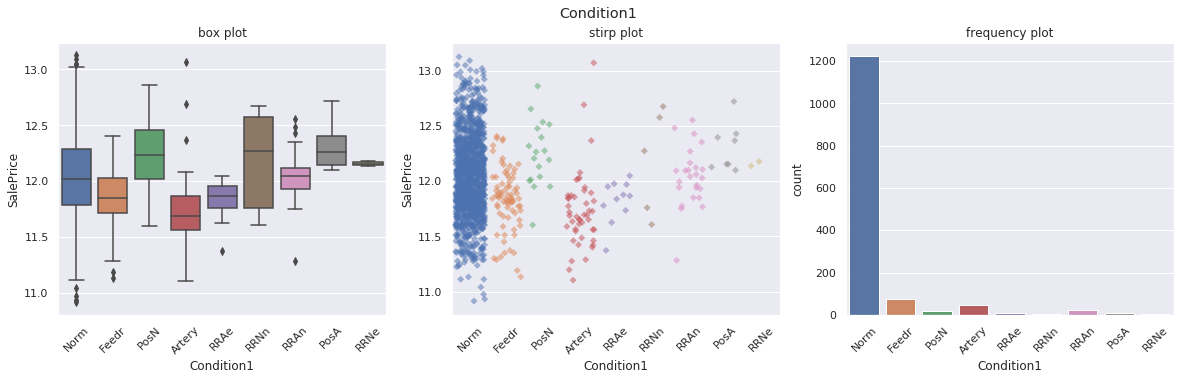

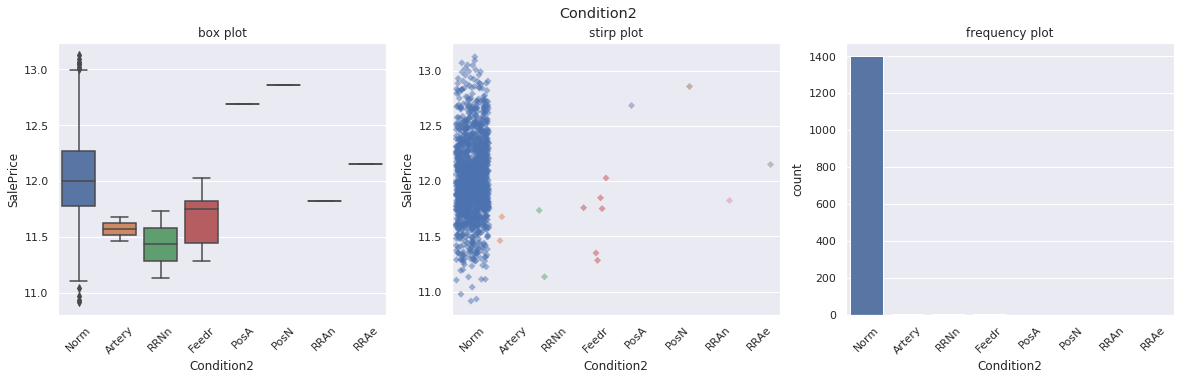

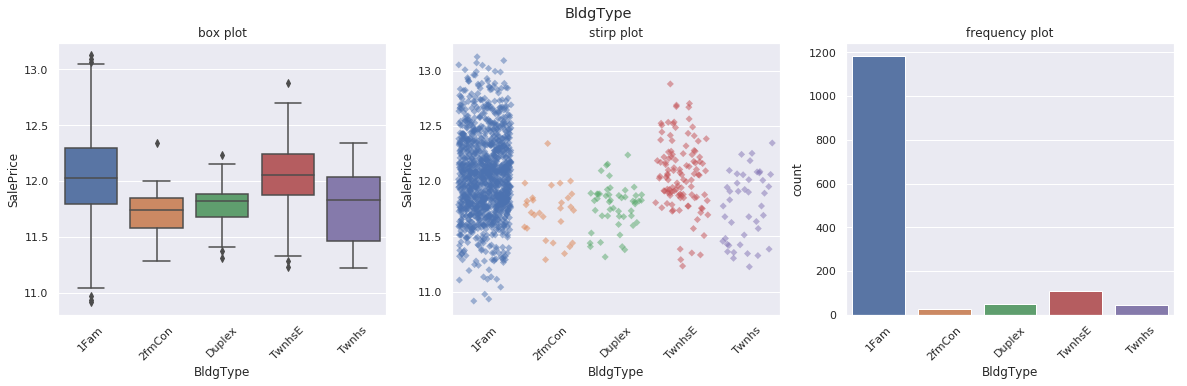

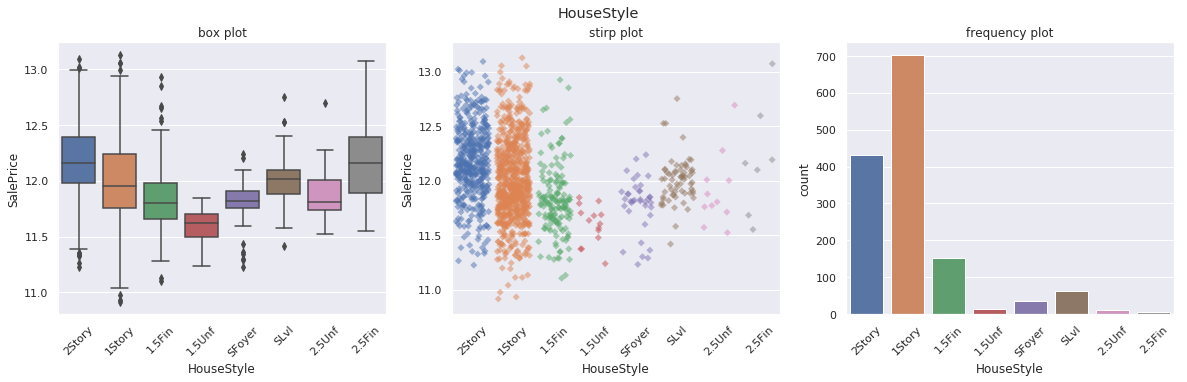

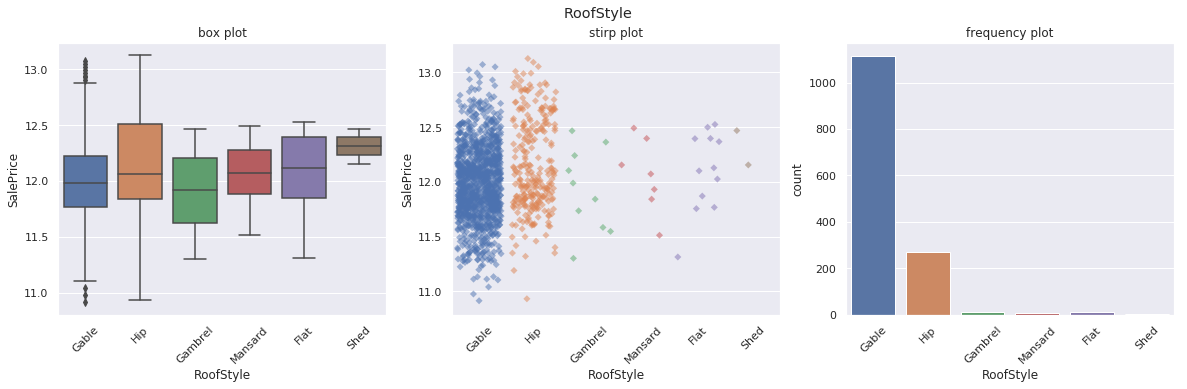

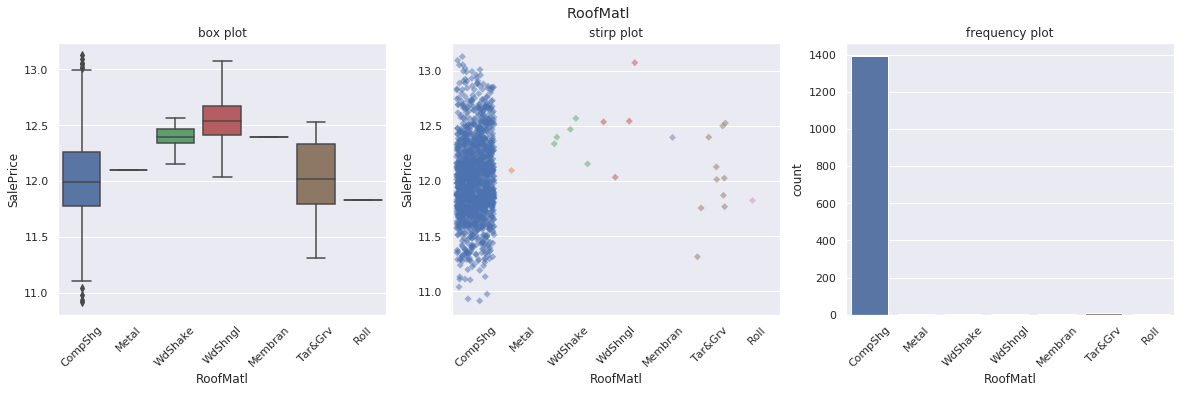

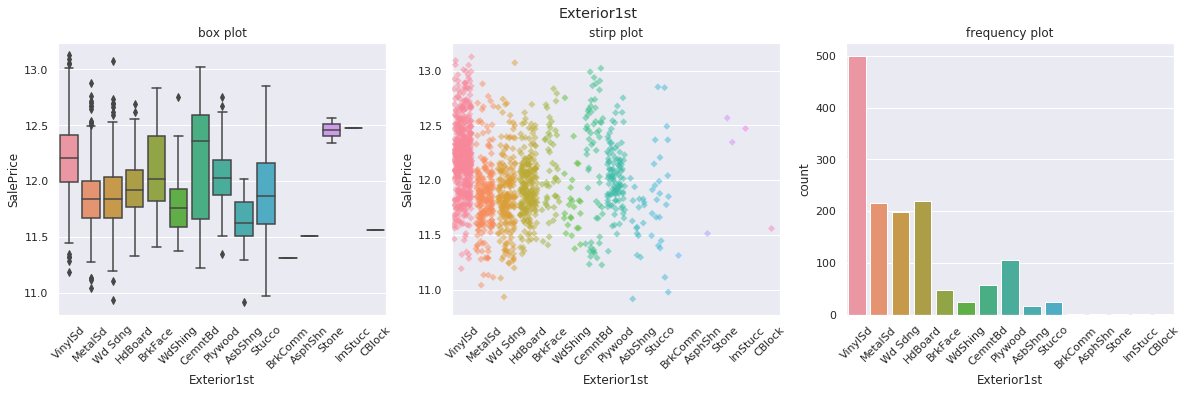

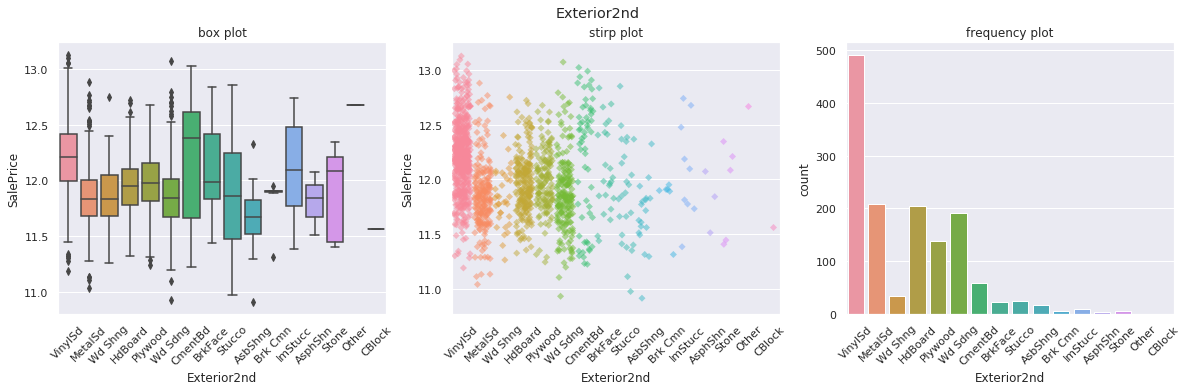

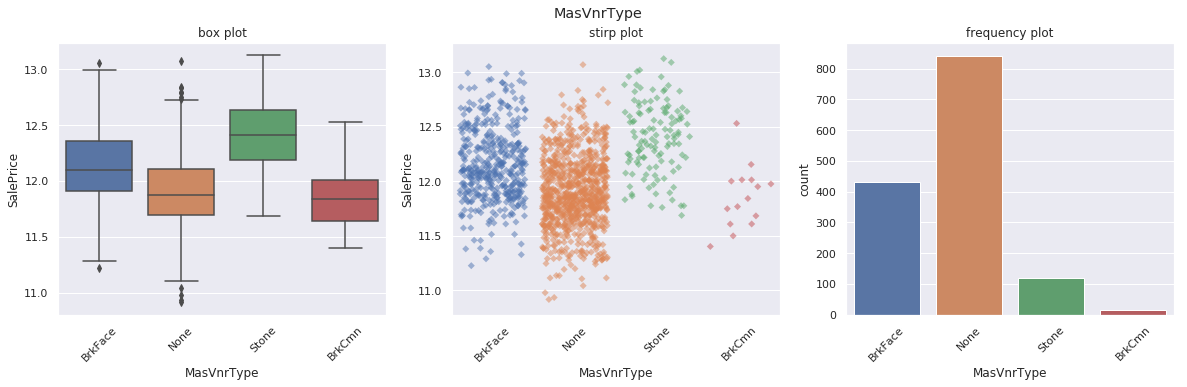

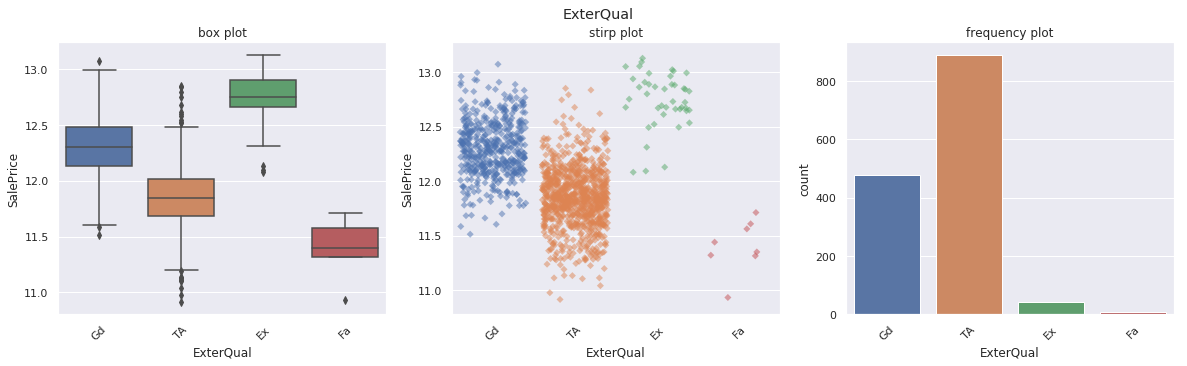

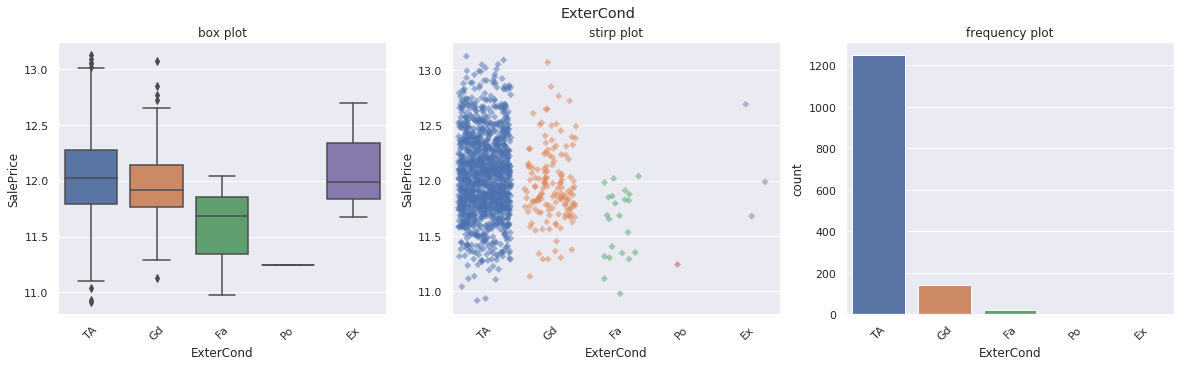

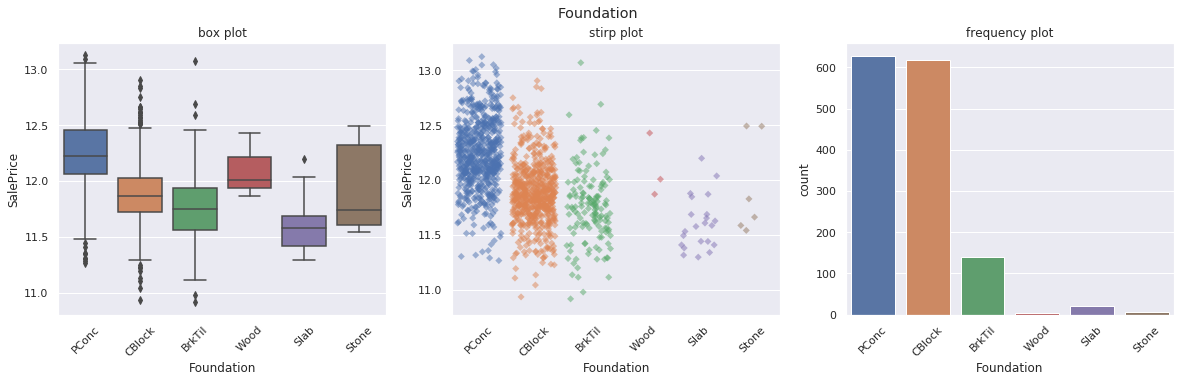

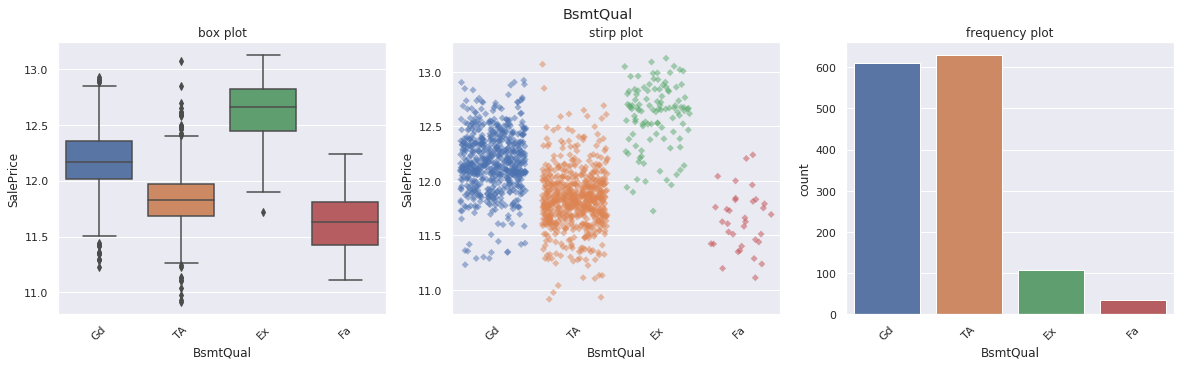

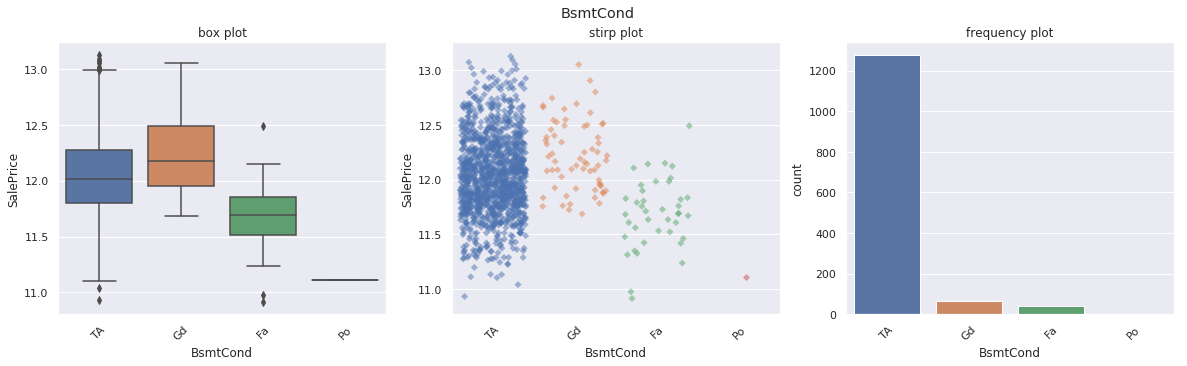

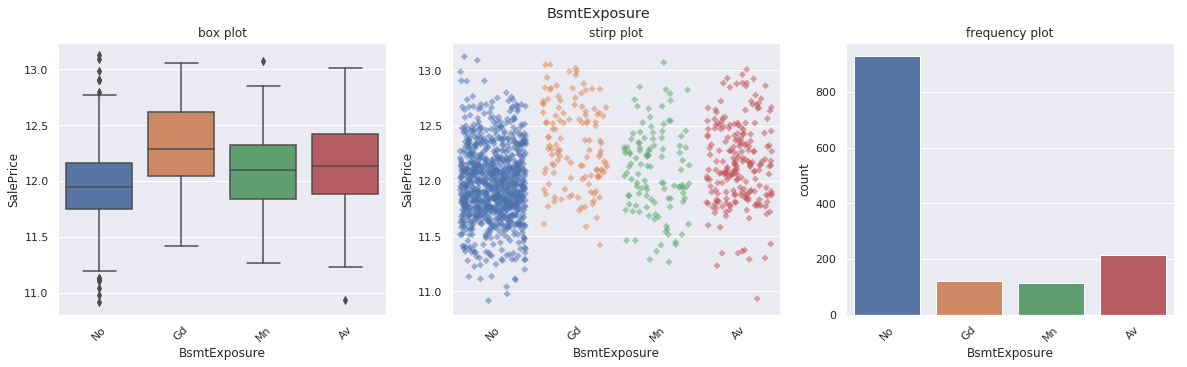

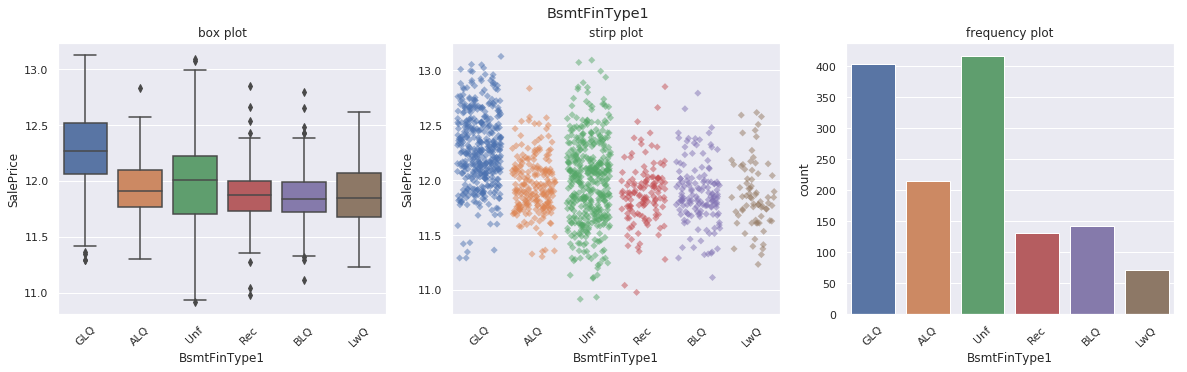

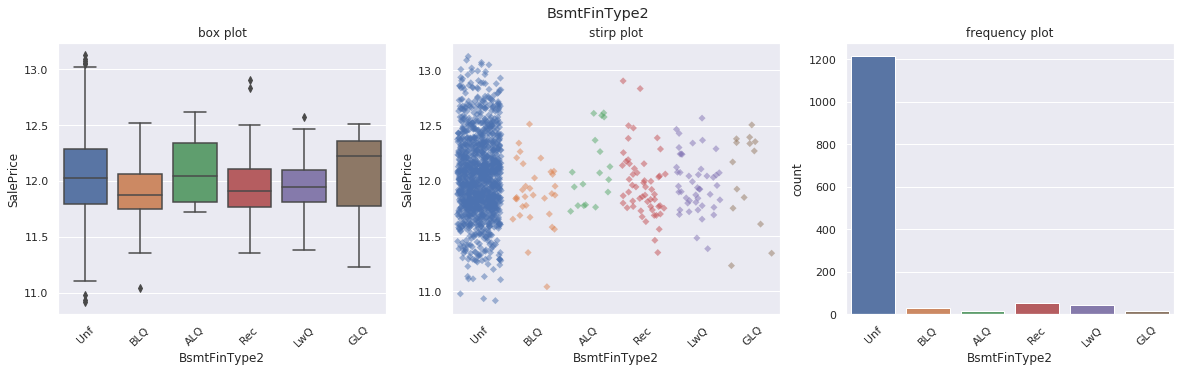

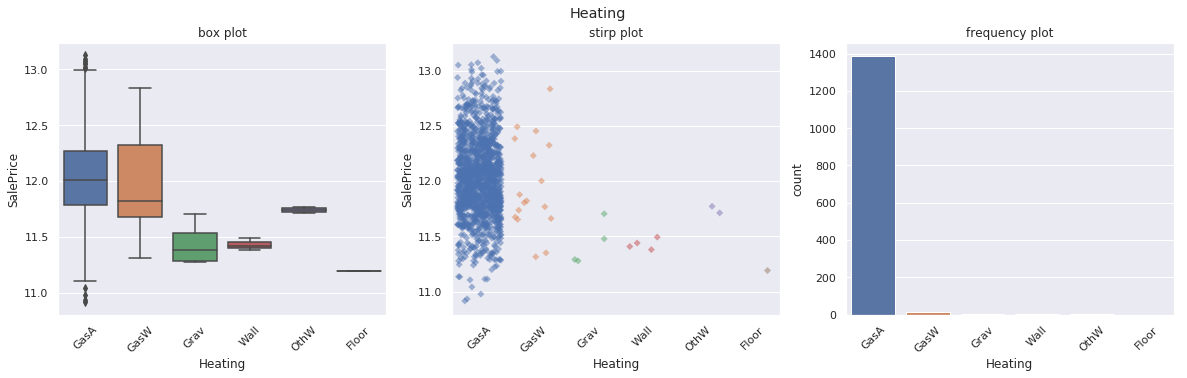

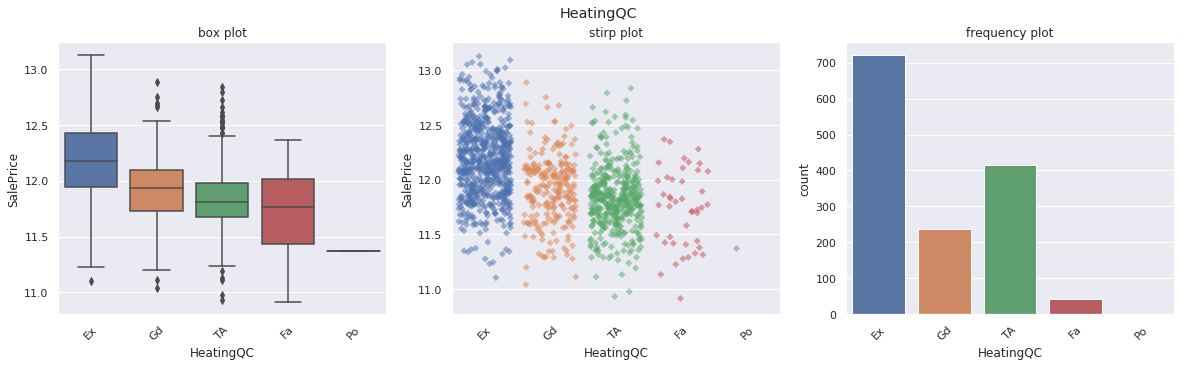

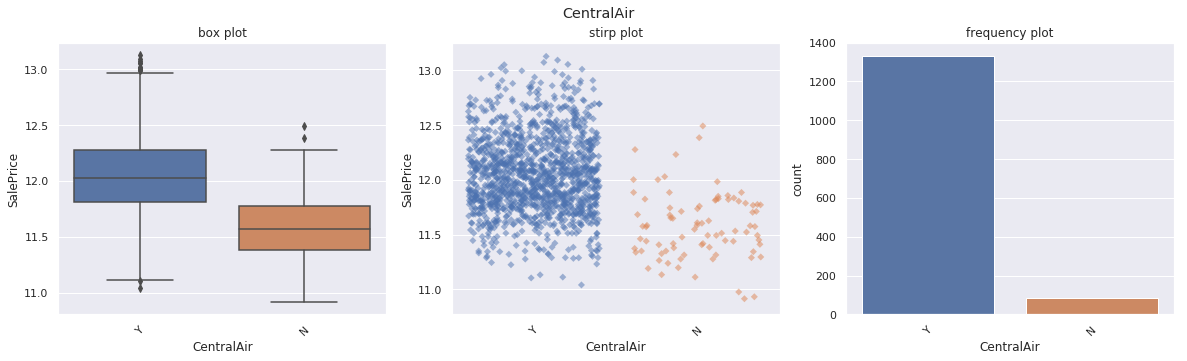

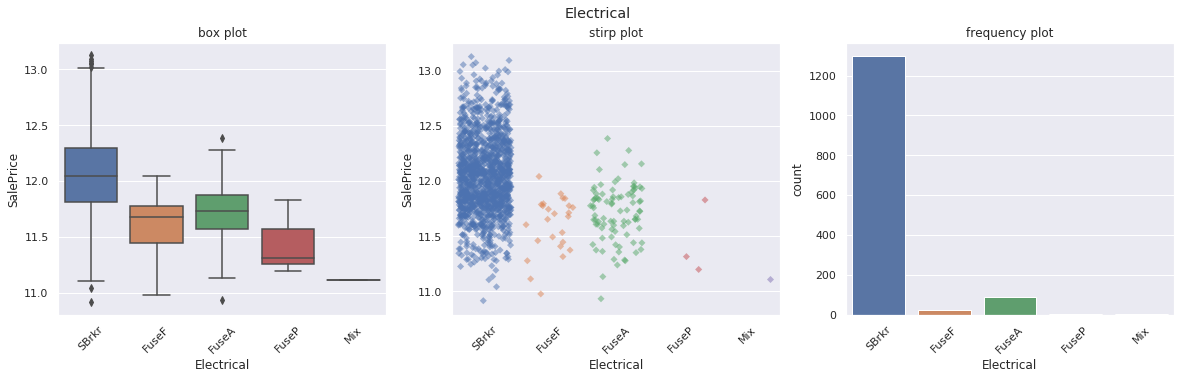

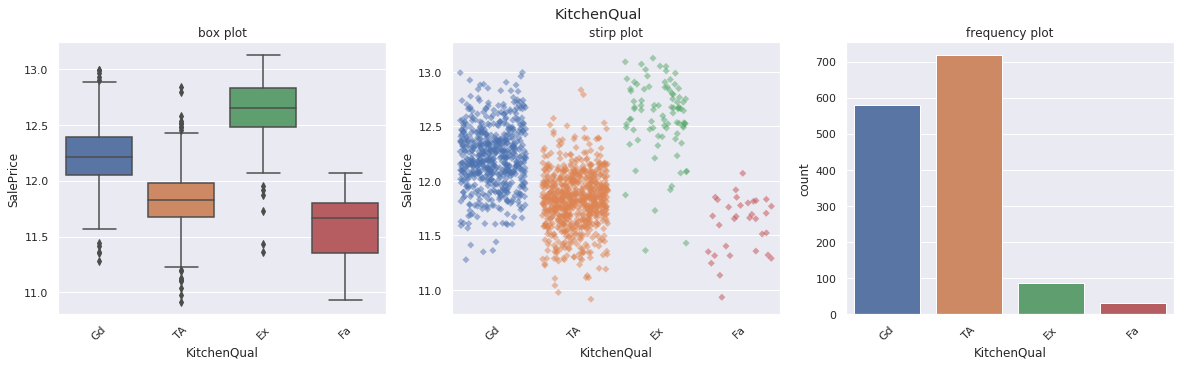

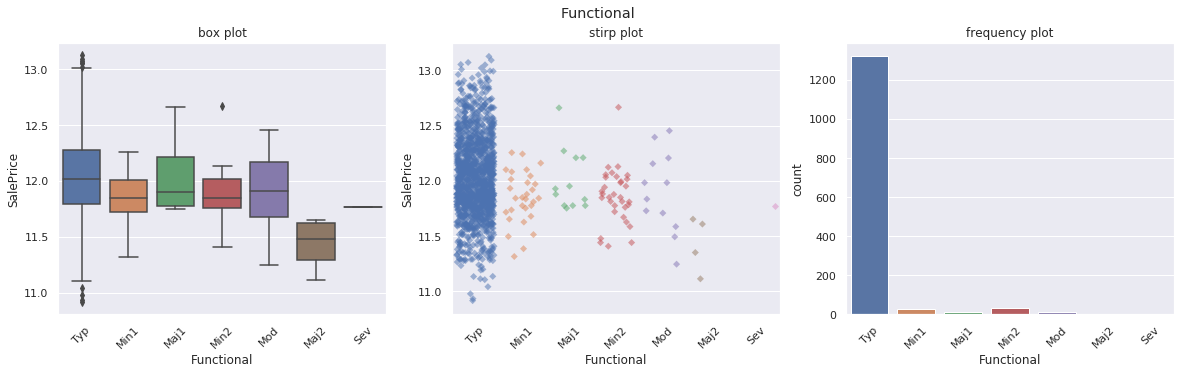

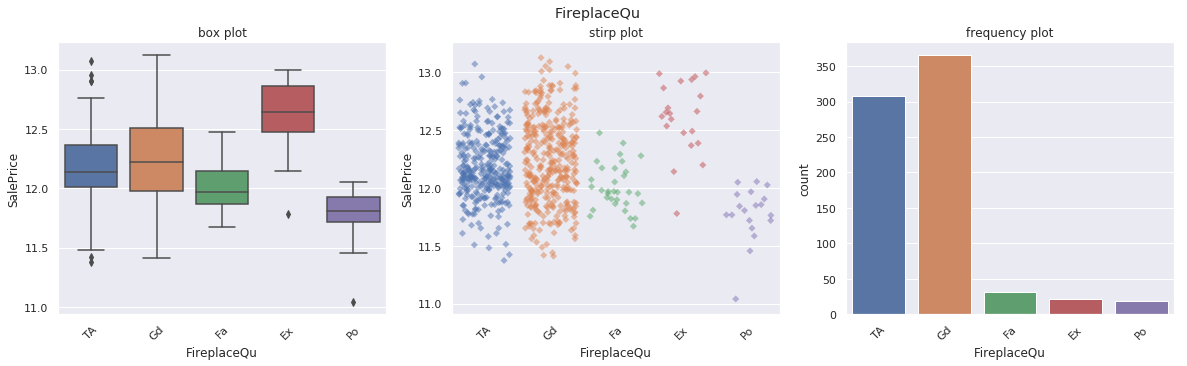

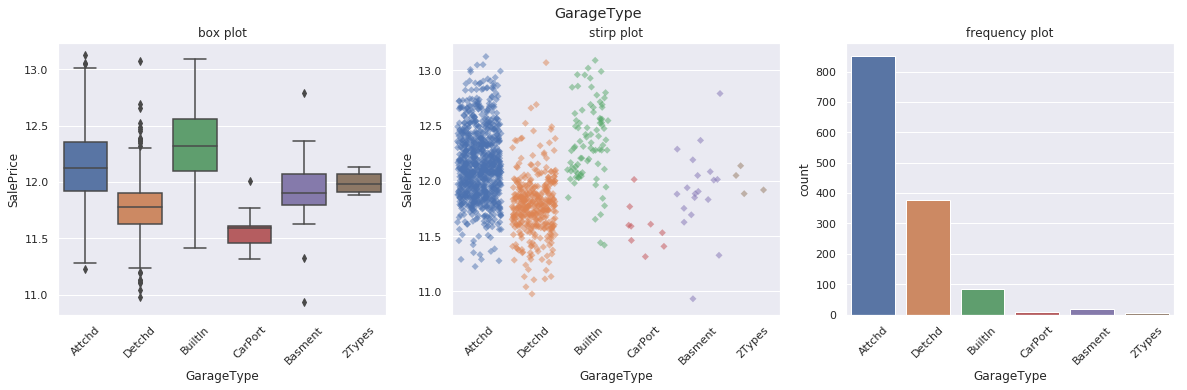

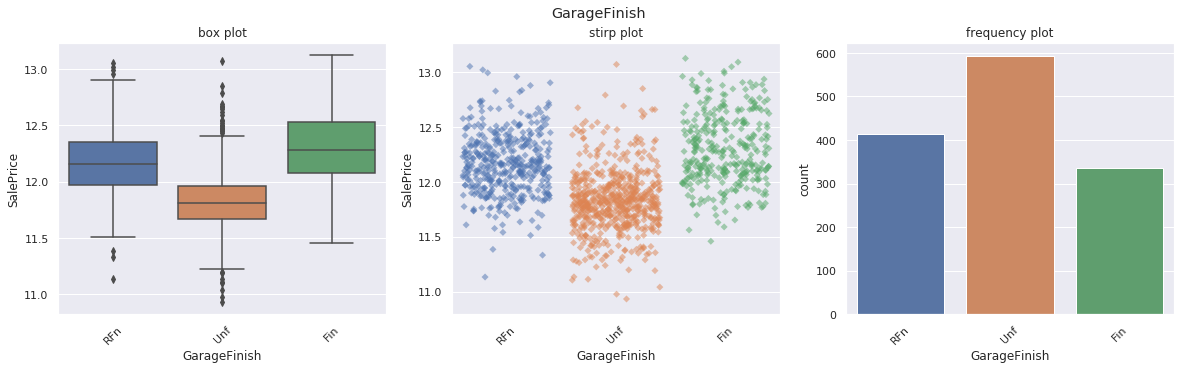

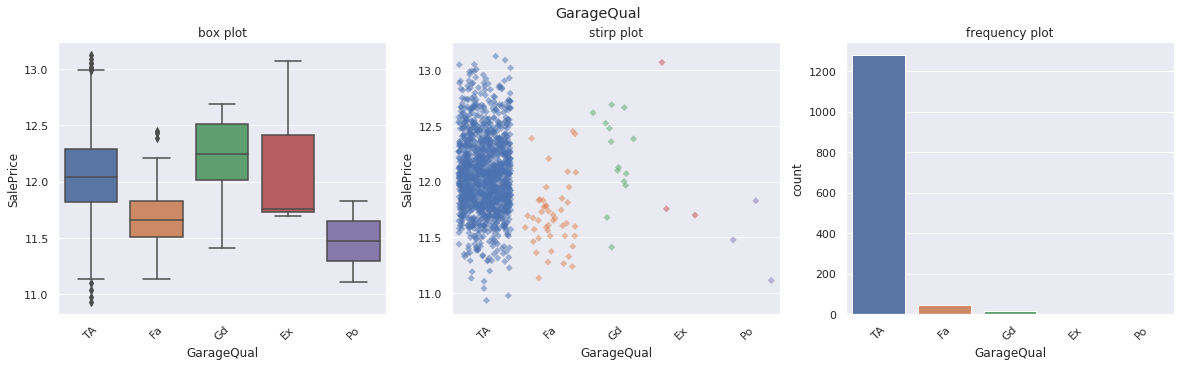

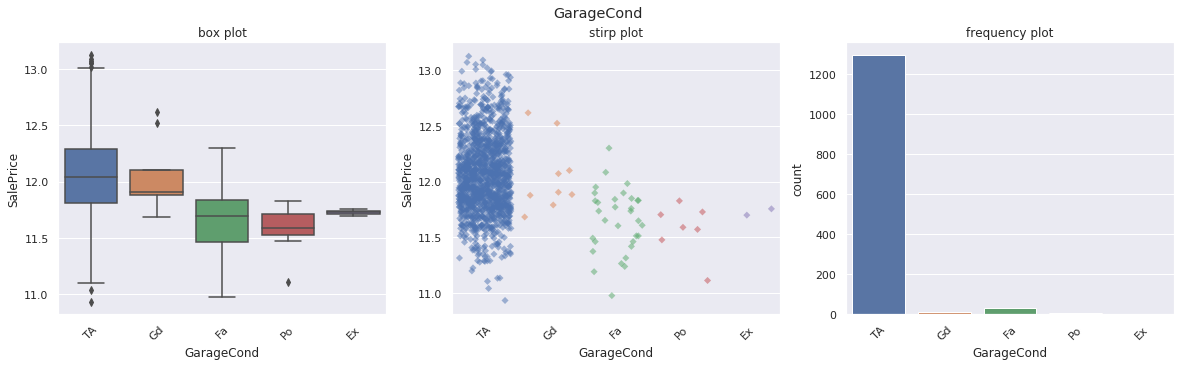

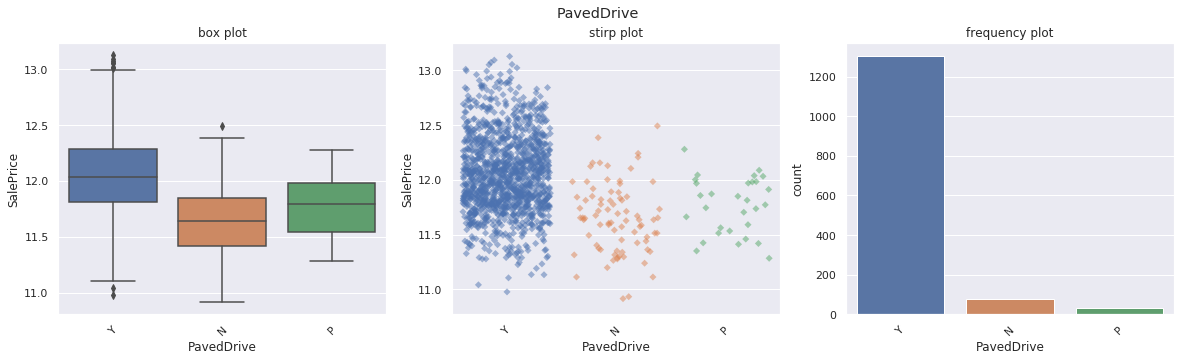

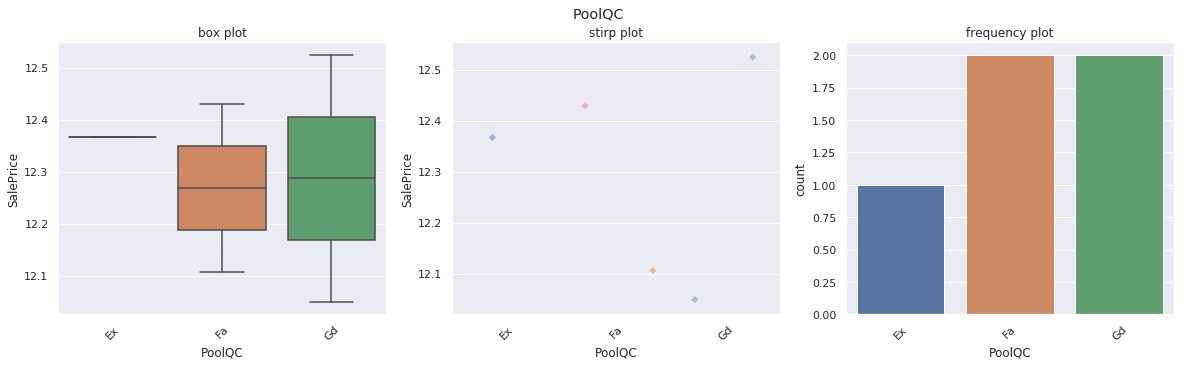

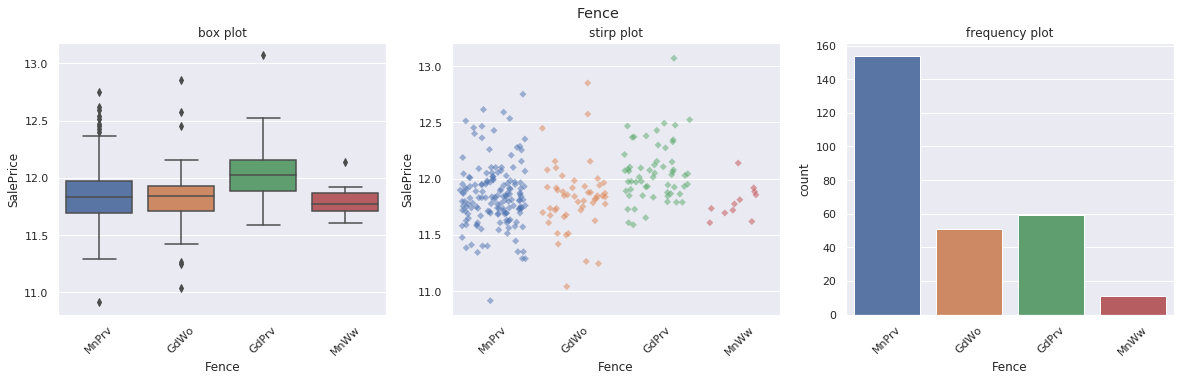

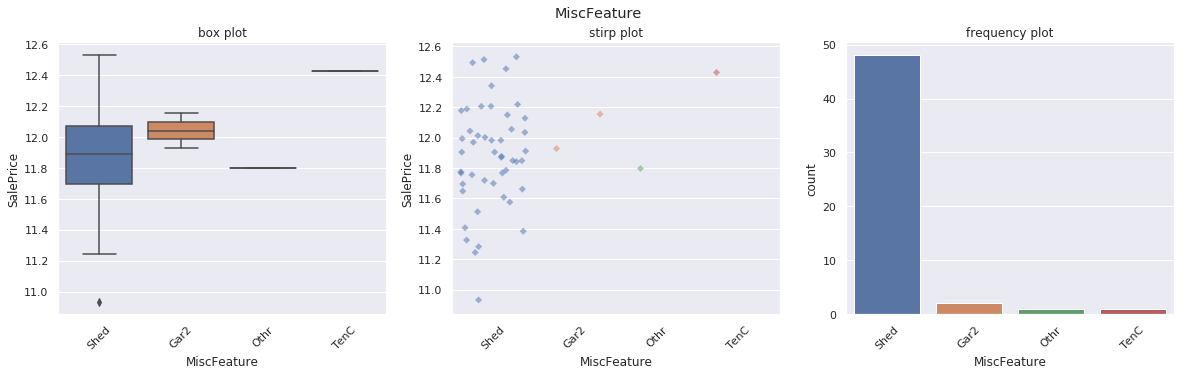

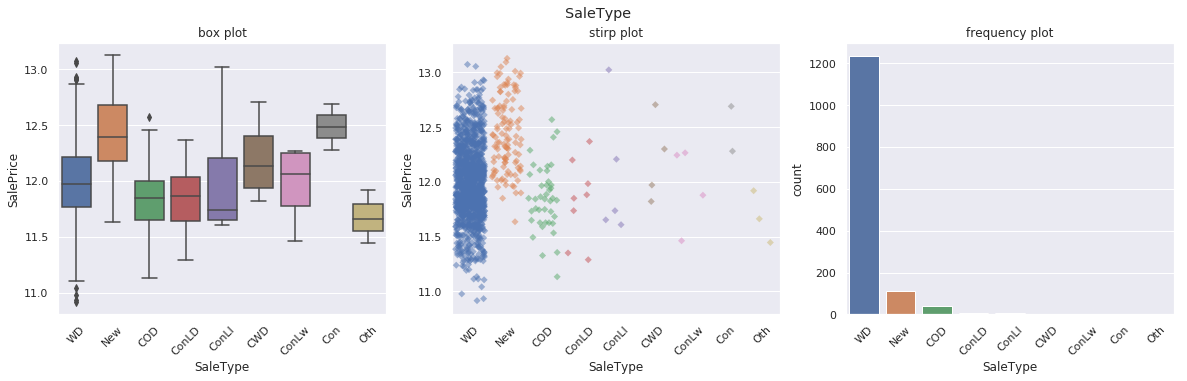

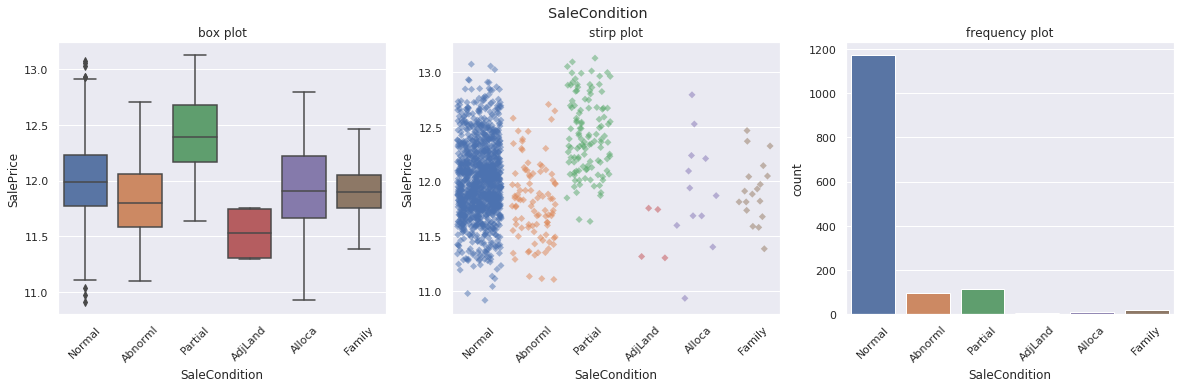

In [42]:
for f in cat_features:
    analyzeCategoricalFeature(f, 'SalePrice')

In [43]:
train_df.drop(cat_to_drop, axis=1, inplace=True)
test_df.drop(cat_to_drop, axis=1, inplace=True)

In [44]:
# missing data cleaning

In [45]:
not_missing_cols = [f for f in train_df.columns if train_df[f].isna().sum() == 0]
not_missing_cols

['Id',
 'MSSubClass',
 'MSZoning',
 'LotArea',
 'LotShape',
 'Neighborhood',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'Exterior1st',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'SaleType',
 'SaleCondition',
 'SalePrice',
 'GarageTotal',
 'RemodToSold']

In [46]:
missing_cols = [f for f in train_df.columns if train_df[f].isna().sum() > 0]
train_df[missing_cols].isna().sum().sort_values()

Electrical        1
MasVnrType        8
MasVnrArea        8
BsmtQual         35
BsmtCond         35
BsmtFinType1     35
BsmtExposure     36
GarageType       72
GarageYrBlt      72
GarageFinish     72
LotFrontage     255
FireplaceQu     671
dtype: int64

In [47]:
test_missing_cols = [f for f in test_df.columns if test_df[f].isna().sum() > 0]
test_df[test_missing_cols].isna().sum().sort_values()

BsmtFinSF2        1
KitchenQual       1
TotalBsmtSF       1
BsmtUnfSF         1
SaleType          1
BsmtFinSF1        1
GarageTotal       1
Exterior1st       1
BsmtFullBath      2
BsmtHalfBath      2
MSZoning          4
MasVnrArea       15
MasVnrType       16
BsmtFinType1     42
BsmtExposure     44
BsmtQual         44
BsmtCond         45
GarageType       76
GarageYrBlt      78
GarageFinish     78
LotFrontage     227
FireplaceQu     730
dtype: int64

In [48]:
# missing value imputing

In [49]:
combined = train_df.drop('SalePrice', axis=1).append(test_df)

missing = combined.isna().sum() > 0
missing_features = missing[missing==True].index
print(missing_features)

for feature in missing_features:
    if combined[feature].dtype == 'object':
        combined[feature] = combined.groupby(['Neighborhood', 'OverallQual'])[feature].transform(lambda x: x.fillna(x.value_counts().index[0]) if (len(x.value_counts().index) > 0) else None)
    else:
        combined[feature] = combined.groupby(['Neighborhood', 'OverallQual'])[feature].transform(lambda x: x.fillna(x.mean()))

Index(['MSZoning', 'LotFrontage', 'Exterior1st', 'MasVnrType', 'MasVnrArea',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'SaleType', 'GarageTotal'],
      dtype='object')


In [50]:
missing = combined.isna().sum() > 0
missing_features = missing[missing==True].index
print(missing_features)

for feature in missing_features:
    if combined[feature].dtype == 'object':
        combined[feature] = combined.groupby(['Neighborhood'])[feature].transform(lambda x: x.fillna(x.value_counts().index[0]) if (len(x.value_counts().index) > 0) else None)
    else:
        combined[feature] = combined.groupby(['Neighborhood'])[feature].transform(lambda x: x.fillna(x.mean()))

Index(['MSZoning', 'LotFrontage', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish'],
      dtype='object')


In [51]:
combined.isna().sum().any()

False

In [52]:
features_to_encode = [f for f in train_df.columns if train_df[f].dtype == 'object']
features_to_encode

['MSZoning',
 'LotShape',
 'Neighborhood',
 'HouseStyle',
 'Exterior1st',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [53]:
#Categorical Feature Encoding

def getObjectColumnsList(df):
    return [cname for cname in df.columns if df[cname].dtype == "object"]

def PerformOneHotEncoding(df,columnsToEncode):
    return pd.get_dummies(df,columns = columnsToEncode)


cat_cols = getObjectColumnsList(combined)
combined = PerformOneHotEncoding(combined, features_to_encode)

In [54]:
combined

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1454  2915         160         21.0     1936            4            7   
1455  2916         160         21.0     1894            4            5   
1456  2917          20        160.0    20000            5            7   
1457  2918          85         62.0    10441            5            5   
1458  2919          60         74.0     9627            7            5   

      YearBuilt  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLw  \
0          2003       196.0       706.0         0.0  ...               0   
1          1976         0.0       978.0         0.0  ...               0   
2          2001       162.0       486.0         0.0  ...               0   
3          1915         0.0       216.0         0.0  ...               0   
4          2000       350.0       655.0         0.0  ...               0   
...         ...         ...         ...         ...  ...             ...   
1454       1970         0.0         0.0         0.0  ...               0   
1455       1970         0.0       252.0         0.0  ...               0   
1456       1960         0.0      1224.0         0.0  ...               0   
1457       1992         0.0       337.0         0.0  ...               0   
1458       1993        94.0       758.0         0.0  ...               0   

      SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0                0             0            1                      0   
1                0             0            1                      0   
2                0             0            1                      0   
3                0             0            1                      1   
4                0             0            1                      0   
...            ...           ...          ...                    ...   
1454             0             0            1                      0   
1455             0             0            1                      1   
1456             0             0            1                      1   
1457             0             0            1                      0   
1458             0             0            1                      0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                         0                     0                     0   
1                         0                     0                     0   
2                         0                     0                     0   
3                         0                     0                     0   
4                         0                     0                     0   
...                     ...                   ...                   ...   
1454                      0                     0                     0   
1455                      0                     0                     0   
1456                      0                     0                     0   
1457                      0                     0                     0   
1458                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
0                        1                      0  
1                        1                      0  
2                        1                      0  
3                        0                      0  
4                        1                      0  
...                    ...                    ...  
1454                     1                      0  
1455                    

In [55]:
# split again
train_df_final = combined.iloc[0:train_df.shape[0]].copy()

# df_train.loc[:, "SalePrice"] = np.log(train.SalePrice)
test_df_final = combined.iloc[train_df.shape[0]::].copy()

In [56]:
# BUILDING MODEL

In [57]:
import xgboost as xgb

model_xgb = xgb.XGBRegressor(n_estimators=800, learning_rate=0.25)

In [58]:
# predictors = ['OverallQual', 'GrLivArea', 'GarageTotal', 'GarageYrBlt', 'TotalBsmtSF', 'FullBath', 'RemodToSold', 'Fireplaces', 'MasVnrArea']

In [59]:
model_xgb.fit(pd.DataFrame(train_df_final), train_df['SalePrice'])

/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[21:21:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.25, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=800,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [60]:
prediction = np.expm1(model_xgb.predict(pd.DataFrame(test_df_final)))
prediction

array([122790.914, 164713.12 , 174625.89 , ..., 152159.86 , 108696.08 ,
       220701.55 ], dtype=float32)

In [61]:
submission = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': prediction
})
submission.to_csv('submission.csv', index=False)